# Section 3. Hypothesis Testing

In this section, we will focus on how to use statistical methods to test out hypothses 

__Hypothesis testing__ contains the following steps:

- State clearly a null hypothesis and its alternative hypothesis. 
- After considering the statistical assumptions being made about the sample in doing the test, decide which test is appropriate, and state the relevant test statistic $T$.
- Compute from the observations the observed value $t_{obs}$ of the test statistic $T$.
- Calculate the p-value. This is the probability, under the null hypothesis, of sampling a test statistic at least as extreme as that which was observed. 
- Reject the null hypothesis, in favor of the alternative hypothesis, if and only if the p-value is less than (or equal to) the significance level (the selected probability) threshold (α), for example 0.05 or 0.01.

### CONTENTS

* <a href='00 - DSC 2022 Welcome and Logistics.ipynb#top'>**Section 0. Welcome and Logistics**</a> 
* <a href='01 - DSC 2022 Problem Definition.ipynb#top'>**Section 1. Problem Definition**</a> 
* <a href='02 - DSC 2022 Exploratory Data Analysis.ipynb#top'>**Section 2. Exploratory Data Analysis**</a> 
* <a href='03 - DSC 2022 Hypothesis testing.ipynb#top'>**Section 3. Hypothesis Testing**</a> 
  * [1. T-test](#t)
  * [2. ANOVA](#anova)
* <a href='07 - DSC 2022 Submission.ipynb#top'>**Section 7. Submission**</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [2]:
cmg = pd.read_excel('cmg.xlsx' ,index_col = 'offeringId')
cmg.head(5)

,offeringPricingDate,offeringType,offeringSector,offeringSubSector,offeringDiscountToLastTrade,offeringPrice,issuerCusip,issuerName,pre15_Price_Normalized,pre14_Price_Normalized,...,pre1_Price_Normalized,underwriters,totalBookrunners,leftLeadFirmId,leftLeadFirmName,post1_Price_Normalized,post7_Price_Normalized,post30_Price_Normalized,post90_Price_Normalized,post180_Price_Normalized
offeringId,,,,,,,,,,,,,,,,,,,,,
b969a1c8-0a26-438a-81e6-5e95f3b30501,2003-10-02,IPO,Consumer Cyclical,Vehicles & Parts,0.0,13.0,501889208,BharCap Acquisition Corp.,NaN,NaN,...,NaN,[{'firmId': '15af8b8d-c949-4fa0-b35e-a6482d3ca...,2,759ce574-3755-480b-8b83-c614f4568db1,Baird,-0.855769,-0.850000,-0.831635,-0.825481,-0.836538
1081394b-c9f2-4479-8dd2-528027ff1eea,2005-07-21,IPO,Communication Services,Telecom Services,0.0,13.0,209034107,GrandSouth Bancorporation,NaN,NaN,...,NaN,[{'firmId': 'dac135c0-9e99-4362-9762-7179a0023...,2,5eb63e75-8f95-464e-86fe-3222865c54ef,Credit Suisse,0.060769,0.136923,0.041538,-0.018462,-0.016923
714a166d-9eb0-4b3c-ab8e-7c0dc6f21ee0,2005-08-04,IPO,Communication Services,Internet Content & Information,0.0,27.0,056752108,Brand Velocity Acquisition Corp,NaN,NaN,...,NaN,[{'firmId': 'a82a866c-d40e-453a-99e1-8acb44efb...,2,dac135c0-9e99-4362-9762-7179a0023c9e,Goldman Sachs & Co.,-0.546148,-0.637407,-0.711852,-0.746296,-0.798111
43f06950-8d20-4cfc-b16d-237e0927e1e6,2005-11-10,IPO,Industrials,Consulting Services,0.0,16.0,G47567105,ProLung Inc.,NaN,NaN,...,NaN,[{'firmId': 'a82a866c-d40e-453a-99e1-8acb44efb...,2,cd9cd378-73b5-4cef-8666-ad2c5149ccd8,Goldman Sachs & Co.,-0.699502,-0.697394,-0.682808,-0.566124,-0.512702
96a13598-121a-41c0-83b5-448843cd8709,2006-02-03,IPO,Energy,Oil & Gas Midstream,0.0,21.0,29273V100,Golden Star Acquisition Corp,NaN,NaN,...,NaN,[{'firmId': '7d932034-3e85-46ab-97b4-b6e8e86ee...,3,8fdb6c2d-3b35-40d4-a886-0a3461b42d98,UBS Investment Bank,-0.730357,-0.738690,-0.740595,-0.703571,-0.688095


<a id='t'></a>
## 1. T-test

Hypothesis in business language: if a deal was made at a discount, then the deal would likely to have worse performance in the future. Let's first transform it to a statistics problem using post180_Price_Normalized as an example.

$$H_0:\overline{\text{post180_Pirce_Normalized}}_{discount}=\overline{\text{post180_Pirce_Normalized}}_{\text{no discount}}$$

$$H_a:\overline{\text{post180_Pirce_Normalized}}_{discount}\neq \overline{\text{post180_Pirce_Normalized}}_{\text{no discount}}$$

Since we are comparing whether two groupss have identical average values, the proper test would be a two-sample t-test. We can either perform a **Student’s t-test** or a **Welch’s t-test**. The two tests both assume that both groups of data are sampled from populations that follow a normal distribution. However, **Student’s t-test** further assumes equal(similar) variance between two groups. 

According to the cell below, we observe that for both discount and non-discount group, the distribution of post180_Price_Normalized is normally distributed. If you would like to be rigorous, you can go for a **Kolmogorov Smirnov test**. Then how do we determine if the two groups have equal variances? The answer is a **F-test**. An F-test  is used to test if the variances of two populations are equal. 

In our case, the two groups we are testing are different in sizes since discounted offers make up 0.63 of the data set. At this point, we decide that it is safer to use a __Welch's t-test__ rather than a student's t-test.  

Discounted offers make up 0.63 of the data set


<AxesSubplot:xlabel='discount', ylabel='post180_Price_Normalized'>

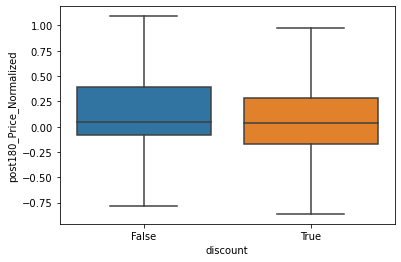

In [3]:
cmg['discount'] = cmg['offeringDiscountToLastTrade']<0
print('Discounted offers make up {} of the data set'.format(round(sum(cmg.discount)/cmg.shape[0],2)))
sns.boxplot(x="discount", y="post180_Price_Normalized", data=cmg,showfliers = False)

In a Welch's t-test, the test statistic is defined as 
\begin{aligned} t = \dfrac{\overline{X}_1 - \overline{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}. \end{aligned} The cell below shows how to perform a Welch's t-test using scipy. 

From the test, we observe a p-value that is extremely small ($9.46891493062355\times10^{-7}$). Recall that p-value is the probability, under the null hypothesis, of sampling a test statistic at least as extreme as that which was observed. In our case, such probability is extremly small, therefore we would reject the null hypothesis. 

In [4]:
ttest_ind(cmg['post180_Price_Normalized'][cmg['discount'] == True],
                cmg['post180_Price_Normalized'][cmg['discount'] == False], equal_var=False)

Ttest_indResult(statistic=-4.909193810565048, pvalue=9.46891493062355e-07)

<a id='anova'></a>
## 2. One Way - Analysis of Variance (ANOVA)

What happens when we have more than two categories for our explanatory variable? Then a t-test would not be enough. What we need then would be one way analysis of varaince(one-way ANOVA). If you are intersted in more in-depth explanations for one way ANOVA, check out  <a href='https://www.stat.cmu.edu/~hseltman/309/Book/chapter7.pdf'>here </a> for more information.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
- The samples are independent.
- Each sample is from a normally distributed population.
- The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

Suppose that we are testing the business hypothesis **sector matters in long-run stock returns(specifically, 180 days post deal)**. Can you 
- formulate the hypothesis in statistics language?
- check whether assumptions of ANOVA are met?
- interpret the results from a ANOVA test?

In [5]:
temp = cmg.groupby(by = 'offeringSector')['post180_Price_Normalized'].agg(['count', 'mean', 'median', 'var']).reset_index()
temp

,offeringSector,count,mean,median,var
0,Basic Materials,242,0.419514,0.121480,4.433251
1,Communication Services,318,0.513995,0.069665,10.115656
2,Consumer Cyclical,700,0.291485,0.090789,1.358893
3,Consumer Defensive,270,0.576793,0.058234,19.927106
4,Energy,700,0.474897,0.018181,17.912476
5,Financial Services,1241,0.121086,0.015000,0.702849
6,Healthcare,2364,1.156742,0.060429,56.850450
7,Industrials,699,0.459338,0.060417,14.710078
8,Real Estate,762,0.077052,0.019520,0.681972
9,Technology,1038,0.281341,0.096752,1.551912


<AxesSubplot:xlabel='offeringSector', ylabel='post180_Price_Normalized'>

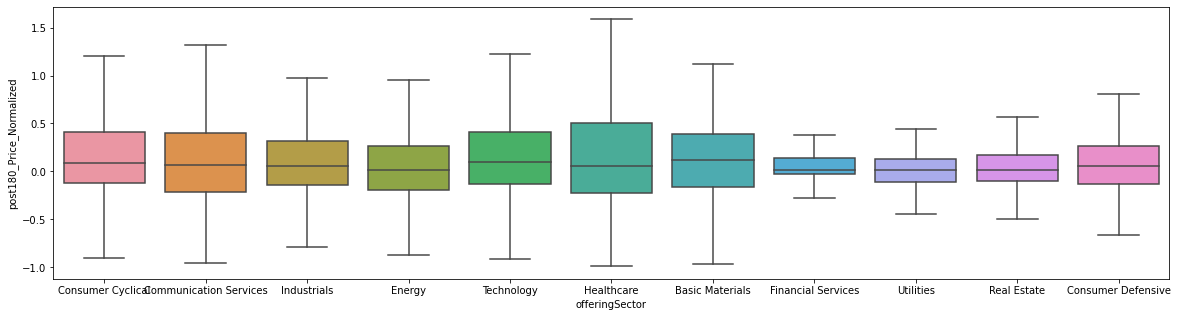

In [6]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'offeringSector', y = 'post180_Price_Normalized', data = cmg, showfliers = False)